In [7]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
#import optuna

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, AveragePooling2D
from keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping, Callback
import tensorflow as tf

In [8]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


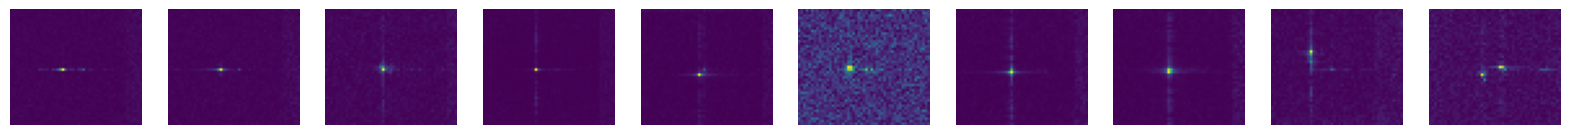

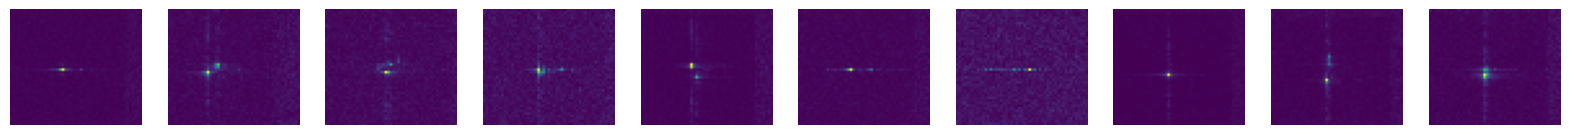

In [17]:
data = np.load('Data/NPZ/data.npz')
x_train_data = data['X_train']
y_train_data = pd.read_csv("Data/y_train.csv")
y_train_data  = y_train_data["target"].values

def display_random_images(x_data: np.array, count: int = 10) -> None:
    index = len(x_data)
    selected_ind = np.random.choice(index, count)
    selected_img = x_data[selected_ind]

    plt.figure(figsize=(20, 5))
    for i in range(count):
        plt.subplot(1, count, i+1)
        plt.imshow(selected_img[i])
        plt.axis('off')
    plt.show()

display_random_images(data['X_train'])
display_random_images(data['X_test'])

In [18]:
X_train_scaled = x_train_data.astype('float32') / 255.0
print(X_train_scaled.size)
y_train_encoded = to_categorical(y_train_data, num_classes=4)
print(y_train_encoded)

148550760
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [19]:
x_train, x_test, y_train, y_test = train_test_split(X_train_scaled ,y_train_encoded, test_size=0.2)

In [20]:
#https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(45, 51, 4)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=(4, 4), activation='relu'))
model.add(AveragePooling2D(pool_size=(4, 4)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))
model.summary()


optimizer = Adam(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 43, 49, 128)       4736      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 24, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 21, 24, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 22, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 11, 256)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 9, 11, 256)        0

In [21]:
history = model.fit(X_train_scaled, y_train_encoded, epochs=170, batch_size=16, validation_split = 0.2)

Epoch 1/170
810/810 [==============================] - 43s 9ms/step - loss: 0.8794 - accuracy: 0.6056 - val_loss: 0.5742 - val_accuracy: 0.7495
Epoch 2/170
810/810 [==============================] - 7s 9ms/step - loss: 0.5009 - accuracy: 0.7972 - val_loss: 0.4260 - val_accuracy: 0.8295
Epoch 3/170
810/810 [==============================] - 7s 9ms/step - loss: 0.3970 - accuracy: 0.8461 - val_loss: 0.3291 - val_accuracy: 0.8684
Epoch 4/170
810/810 [==============================] - 8s 9ms/step - loss: 0.3346 - accuracy: 0.8691 - val_loss: 0.2847 - val_accuracy: 0.8906
Epoch 5/170
810/810 [==============================] - 7s 9ms/step - loss: 0.2994 - accuracy: 0.8866 - val_loss: 0.2837 - val_accuracy: 0.8869
Epoch 6/170
810/810 [==============================] - 7s 9ms/step - loss: 0.2759 - accuracy: 0.8936 - val_loss: 0.2542 - val_accuracy: 0.9061
Epoch 7/170
810/810 [==============================] - 7s 9ms/step - loss: 0.2540 - accuracy: 0.9026 - val_loss: 0.2771 - val_accuracy: 0.892

Test loss: 0.016827085986733437
Test accuracy: 99.66018199920654 %


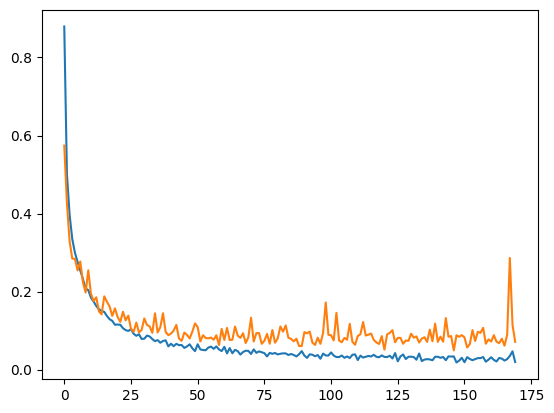

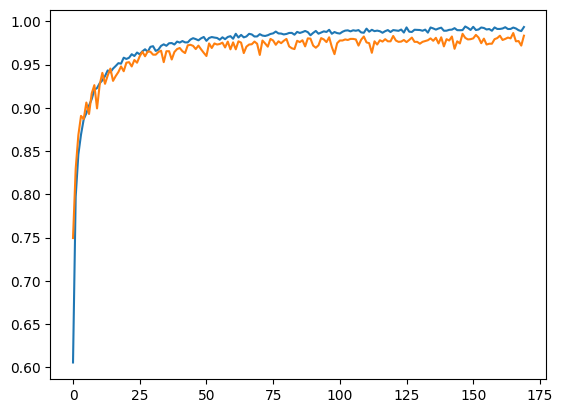

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [23]:
x_test_real = data['X_test']
print(x_test_real.size)
X_test_scaled = x_test_real.astype('float32') / 255.0
print(X_train_scaled.size)

predictions = np.argmax(model.predict(X_test_scaled), axis=1)
print(predictions.size)
df = pd.DataFrame({'id': range(len(predictions)), 'target': predictions})
df.to_csv('predictions.csv', index=False)

44027280
148550760
150/150 [==============================] - 1s 4ms/step
4796
